## **TITANIC SURVIVORS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_columns', None)

In [2]:
dataset = pd.read_csv('titanic.csv')

dataset.shape

(891, 12)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## **EDA**

In [4]:
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**In data analysis we will analyze to fin out the bellow stuff**

1. Missing values
2. All the Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardibality of Categorical Variables
6. Outliers
7. Relationships between independent and depedent feature 

**Missing Values**

In [6]:
target = 'Survived'
features = dataset.columns.drop(target)

target_NA_values = dataset[target].isnull().sum()
features_NA_values = [feature for feature in features if dataset[feature].isnull().sum()>1]

print(f'Target NA values:{target_NA_values}',f'Features NA Values:{features_NA_values}')

Target NA values:0 Features NA Values:['Age', 'Cabin', 'Embarked']


In [7]:

for feature in features_NA_values:
    print(feature,f'{np.round(dataset[feature].isnull().mean()*100,1)}% Missing Values')


Age 19.9% Missing Values
Cabin 77.1% Missing Values
Embarked 0.2% Missing Values


**Relationship between missing values and Target**

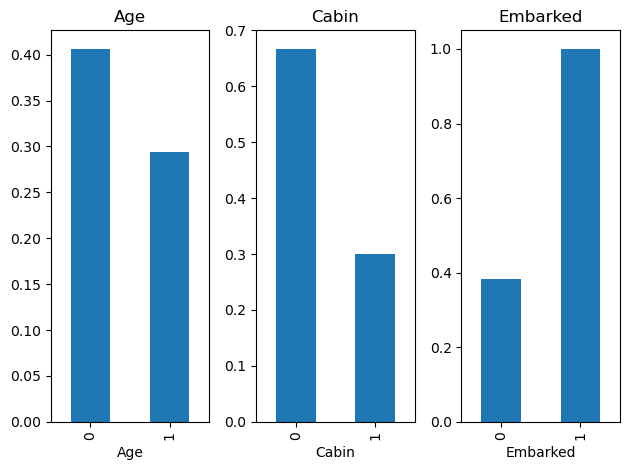

In [8]:
len_features_NA_values = len(features_NA_values)
count = 0
subplot_lines = int(np.ceil(len_features_NA_values/3))

for feature in features_NA_values:
    count+= 1
    data = dataset.copy()
    plt.subplot(subplot_lines,3,count)

    data[feature] = np.where(data[feature].isnull(),1,0)
    data.groupby(feature)[target].mean().plot.bar()
    plt.title(feature)

plt.tight_layout()
plt.show()


We need to replace these NaN values with something meaningful 

**Numerical Variables**

In [9]:
numerical_columns = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f'Number of numerical variables:{len(numerical_columns)}')

dataset[numerical_columns].head()

Number of numerical variables:7


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


**Temporal Variables**

Verificar a relação das variaveis temporais com o target 

In [10]:
year_feature = [feature for feature in numerical_columns if 'Yr' in feature or 'Year' in feature]

year_feature

[]

In [11]:
for feature in year_feature:
    print(feature, len(dataset[feature].unique()))

a=[1,2,3]

In [12]:
if not len(year_feature)== 0:
    dataset.groupby(feature[1])[target].median().plot()

**Numerical Discrete Variables**

In [13]:
discrete_features = [feature for feature in numerical_columns if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']+[target]]
print(f'Discrete variables count:{len(discrete_features)}')


Discrete variables count:3


In [14]:
discrete_features

['Pclass', 'SibSp', 'Parch']

In [15]:
dataset[discrete_features+[target]].head(10)

,Pclass,SibSp,Parch,Survived
0,3,1,0,0
1,1,1,0,1
2,3,0,0,1
3,1,1,0,1
4,3,0,0,0
5,3,0,0,0
6,1,0,0,0
7,3,3,1,0
8,3,0,2,1
9,2,1,0,1


**Relationship between Numerical discrete features and SalePrice**

Pclass Pclass
1    63.0
2    47.3
3    24.2
Name: Survived, dtype: float64% Missing Values


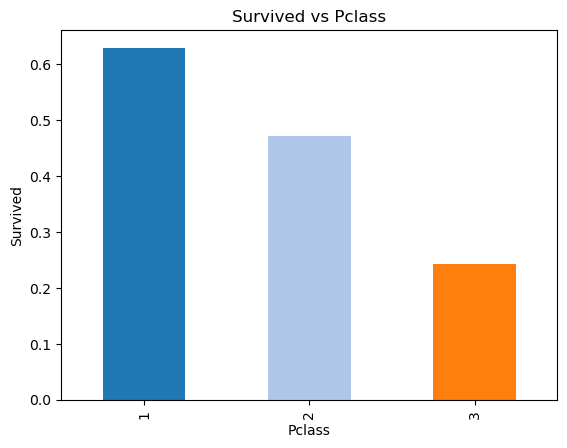

SibSp SibSp
0    34.5
1    53.6
2    46.4
3    25.0
4    16.7
5     0.0
8     0.0
Name: Survived, dtype: float64% Missing Values


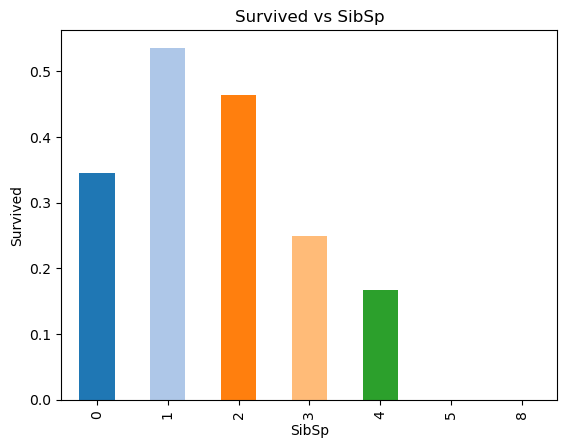

Parch Parch
0    34.4
1    55.1
2    50.0
3    60.0
4     0.0
5    20.0
6     0.0
Name: Survived, dtype: float64% Missing Values


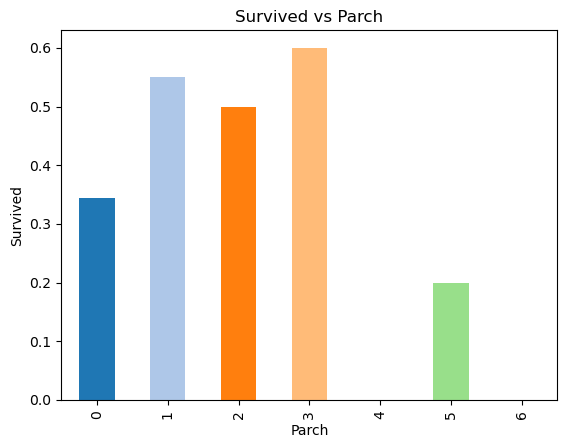

In [16]:
for feature in discrete_features:
    data = dataset[[feature,target]].copy()
    data.groupby(feature)[target].mean().plot.bar(color=plt.cm.tab20.colors)
    plt.xlabel(feature)
    plt.ylabel(target)
    print(feature,f'{np.round(data.groupby(feature)[target].mean()*100,1)}% Missing Values')
    # plt.yticks(np.arange(0,1.1,0.1))
    plt.title(f'{target} vs {feature}')
    plt.show()

**Numerical Continuos Variables** 

In [17]:
continuos_feature = [feature for feature in numerical_columns if feature not in discrete_features+year_feature+['Id']+[target] and not 'Id' in feature]
print(f'Continuos variables count: {len(continuos_feature)}')

Continuos variables count: 2


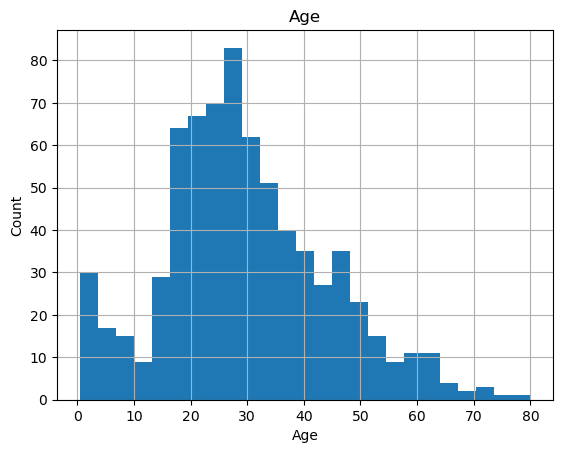

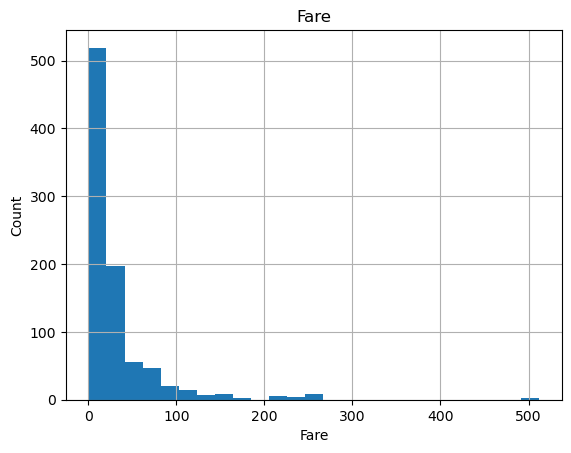

In [18]:
for feature in continuos_feature:
    data = dataset[[feature]].copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

## **EDA Part 2**

**Outliers**

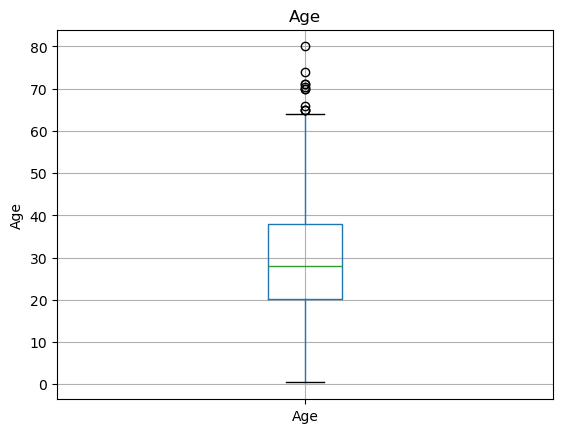

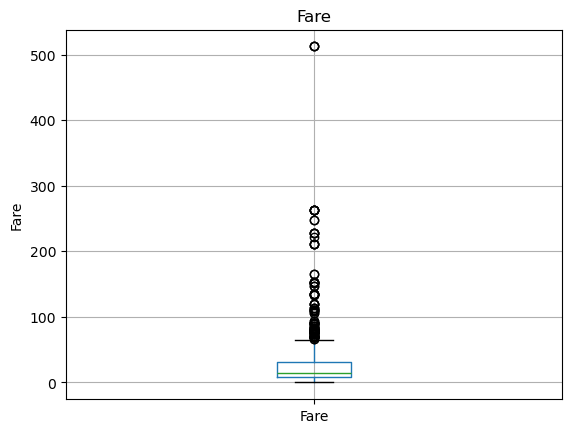

In [19]:
for feature in continuos_feature:
    data = dataset.copy()
    data.boxplot(column = feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()


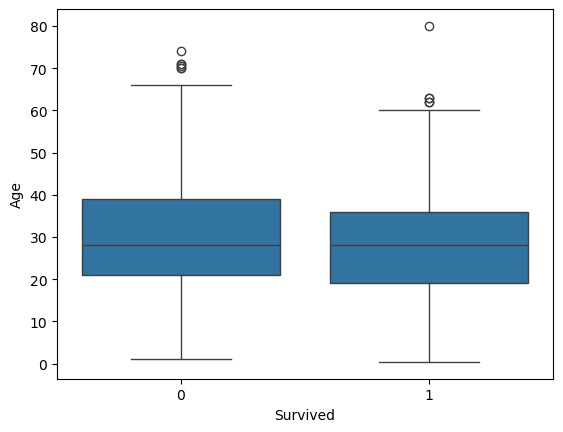

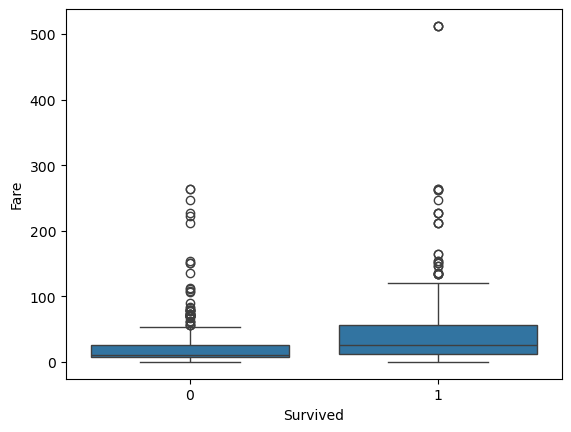

In [20]:
for feature in continuos_feature:
    data = dataset.copy()
    sn.boxplot(x=target, y=feature, data=data)
    plt.show()

 **Categorical Variables**

In [21]:
categorical_features = dataset.select_dtypes(include=['object']).columns.tolist()

print(f'Categorical features count : {len(categorical_features)}')

Categorical features count : 5


In [22]:
categorical_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [23]:
dataset[categorical_features].head(10)

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
5,"Moran, Mr. James",male,330877,NaN,Q
6,"McCarthy, Mr. Timothy J",male,17463,E46,S
7,"Palsson, Master. Gosta Leonard",male,349909,NaN,S
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,347742,NaN,S
9,"Nasser, Mrs. Nicholas (Adele Achem)",female,237736,NaN,C


In [24]:
for feature in categorical_features:
    print(f'The feature is {feature} and number of categories are {len(dataset[feature].unique())}')

The feature is Name and number of categories are 891
The feature is Sex and number of categories are 2
The feature is Ticket and number of categories are 681
The feature is Cabin and number of categories are 148
The feature is Embarked and number of categories are 4


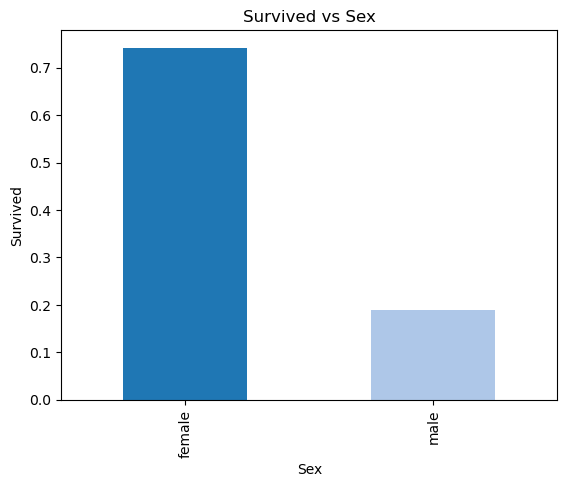

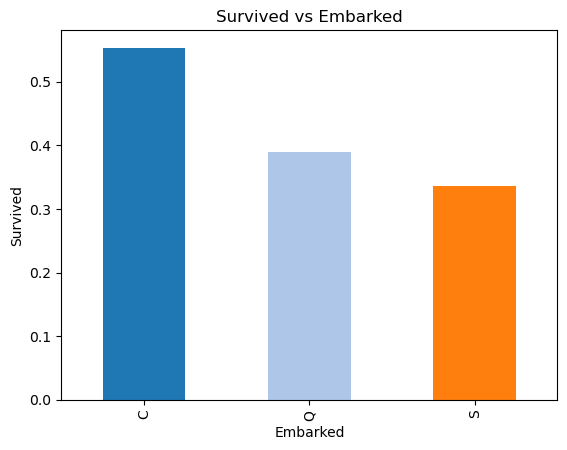

In [25]:
##Find out the relationship between categorical features and dependent feature

for feature in categorical_features:
    if len(data[feature].unique())<10 :
        data = dataset.copy()
        data.groupby(feature)[target].mean().plot.bar(color=plt.cm.tab20.colors)
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.title(f'{target} vs {feature}')
        plt.show()

### **Feature Engineering**

In [26]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df = dataset.copy()

In [28]:
df.drop(columns=['PassengerId','Name'], inplace=True)

In [29]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,male,54.0,0,0,17463,51.8625,E46,S
7,0,3,male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,female,14.0,1,0,237736,30.0708,NaN,C


In [30]:
cat_features_nan = [feature for feature in categorical_features if dataset[feature].isnull().sum()>1]

for feature in cat_features_nan:
    print(f'{feature}: {100*np.round(df[feature].isnull().mean(),3)}% Missing values') 

Cabin: 77.10000000000001% Missing values
Embarked: 0.2% Missing values


In [31]:
for feature in cat_features_nan:
    if df[feature].isnull().mean()*100<5:
        df.dropna(subset=[feature],inplace=True)
        print(f'Lines NaN of {feature} Removed')

Lines NaN of Embarked Removed


In [32]:
for feature in cat_features_nan:
    print(f'{feature}: {100*np.round(df[feature].isnull().mean(),3)}% Missing values') 

Cabin: 77.3% Missing values
Embarked: 0.0% Missing values


In [33]:
num_features_nan = [feature for feature in numerical_columns if dataset[feature].isnull().sum()>1]

for feature in num_features_nan:
    print(f'{feature}: {100*np.round(df[feature].isnull().mean(),1)}% Missing values') 

Age: 20.0% Missing values


In [34]:
df['Ticket_numeric_only'] = df['Ticket'].str.isnumeric().astype(int)

In [35]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_numeric_only
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S,1
887,1,1,female,19.0,0,0,112053,30.0000,B42,S,1
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,1,1,male,26.0,0,0,111369,30.0000,C148,C,1


In [36]:
features = df.columns.drop(target)

In [37]:

X = df[features]
Y = df[target]


In [38]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2, random_state=42)

In [39]:
Xtrain.shape, Xtest.shape

((711, 10), (178, 10))

In [40]:
ticket_counts_train = Xtrain['Ticket'].value_counts()

Xtrain['Ticket_group_size'] = Xtrain['Ticket'].map(ticket_counts_train)
Xtest['Ticket_group_size'] = Xtest['Ticket'].map(ticket_counts_train).fillna(1) 

In [41]:
Xtrain

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_numeric_only,Ticket_group_size
708,1,female,22.0,0,0,113781,151.5500,NaN,S,1,2
240,3,female,NaN,1,0,2665,14.4542,NaN,C,1,1
382,3,male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S,0,1
792,3,female,NaN,8,2,CA. 2343,69.5500,NaN,S,0,7
683,3,male,14.0,5,2,CA 2144,46.9000,NaN,S,0,5
...,...,...,...,...,...,...,...,...,...,...,...
107,3,male,NaN,0,0,312991,7.7750,NaN,S,1,1
271,3,male,25.0,0,0,LINE,0.0000,NaN,S,0,4
862,1,female,48.0,0,0,17466,25.9292,D17,S,1,1
436,3,female,21.0,2,2,W./C. 6608,34.3750,NaN,S,0,4


In [42]:
# Tem cabine ou não (binário)
# Pode indicar 1ª/2ª classe (passageiros da 3ª classe muitas vezes não têm cabine registrada).
Xtrain['Has_cabin'] = Xtrain['Cabin'].notna().astype(int)
Xtest['Has_cabin'] = Xtest['Cabin'].notna().astype(int)

In [43]:
Xtrain['Sex'] = Xtrain['Sex'].map({'male':1, 'female': 0})
Xtest['Sex'] = Xtest ['Sex'].map({'male':1, 'female': 0})

In [44]:
Xtrain.drop(columns=['Ticket','Cabin'], inplace=True)
Xtest.drop(columns=['Ticket','Cabin'], inplace=True)

In [45]:
Xtrain

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_numeric_only,Ticket_group_size,Has_cabin
708,1,0,22.0,0,0,151.5500,S,1,2,0
240,3,0,NaN,1,0,14.4542,C,1,1,0
382,3,1,32.0,0,0,7.9250,S,0,1,0
792,3,0,NaN,8,2,69.5500,S,0,7,0
683,3,1,14.0,5,2,46.9000,S,0,5,0
...,...,...,...,...,...,...,...,...,...,...
107,3,1,NaN,0,0,7.7750,S,1,1,0
271,3,1,25.0,0,0,0.0000,S,0,4,0
862,1,0,48.0,0,0,25.9292,S,1,1,1
436,3,0,21.0,2,2,34.3750,S,0,4,0


### **Missing Values**

In [46]:
 #Replace missing values with new label

def replace_cat_feature(dataset, feature_nan):
    data = dataset.copy()
    data[feature_nan] = data[feature_nan].fillna('Missing')
    return data


df[cat_features_nan].isnull().sum()

Cabin       687
Embarked      0
dtype: int64

In [47]:
num_features_nan

['Age']

In [48]:
## Replacing the numerical Missing Values
for feature in num_features_nan:

    median_value = Xtrain[feature].median()

    Xtrain[feature+'NaN'] = np.where(Xtrain[feature].isnull(),1,0)
    Xtrain[feature].fillna(median_value,inplace=True)

    Xtest[feature+'NaN'] = np.where(Xtest[feature].isnull(),1,0)
    Xtest[feature].fillna(median_value,inplace=True)


Xtrain[num_features_nan].isnull().sum()
# Xtest[num_features_nan].isnull().sum()

C:\Users\carva\AppData\Local\Temp\ipykernel_5480\1105139747.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Xtrain[feature].fillna(median_value,inplace=True)
C:\Users\carva\AppData\Local\Temp\ipykernel_5480\1105139747.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Age    0
dtype: int64

In [49]:
# Equivalent
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy='median')  # ou 'mean'

# # Fit apenas no treino — aqui aprende a mediana
# imputer.fit(Xtrain[['Age']])

# # Transform no train e no test
# Xtrain['Age'] = imputer.transform(Xtrain[['Age']])
# Xtest['Age'] = imputer.transform(Xtest[['Age']])

In [50]:
Xtrain.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_numeric_only,Ticket_group_size,Has_cabin,AgeNaN
708,1,0,22.0,0,0,151.5500,S,1,2,0,0
240,3,0,28.5,1,0,14.4542,C,1,1,0,1
382,3,1,32.0,0,0,7.9250,S,0,1,0,0
792,3,0,28.5,8,2,69.5500,S,0,7,0,1
683,3,1,14.0,5,2,46.9000,S,0,5,0,0


### **Handling Categorical Features**

We will remove categorical varibles that are present less than 1% of the observations

In [51]:
categorical_features = Xtrain.select_dtypes(include=['object']).columns.tolist()

for feature in categorical_features:
    df_train = Xtrain.copy()
    df_train[target] = Ytrain
    temp = df_train.groupby(feature)[target].count()/len(df_train)
    temp_df = temp[temp>0.01].index
    df_train[feature] = np.where(df_train[feature].isin(temp_df),df_train[feature],'RareVar')
    

In [54]:
temp


Embarked
C    0.185654
Q    0.091421
S    0.722925
Name: Survived, dtype: float64

In [56]:
Xtrain.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_numeric_only,Ticket_group_size,Has_cabin,AgeNaN
708,1,0,22.0,0,0,151.5500,S,1,2,0,0
240,3,0,28.5,1,0,14.4542,C,1,1,0,1
382,3,1,32.0,0,0,7.9250,S,0,1,0,0
792,3,0,28.5,8,2,69.5500,S,0,7,0,1
683,3,1,14.0,5,2,46.9000,S,0,5,0,0


### **Compute Categorization**

In [57]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Dropa a primeira coluna de cada variavel categorica 
categorical_columns = Xtrain.select_dtypes(include=['object']).columns.tolist()

encoder = make_column_transformer(
    (OneHotEncoder(
        # drop='first', # evita multicolinearidade, mas não precisamos numa DT
        sparse_output=False, # retorna array denso
        handle_unknown= 'ignore' # ignora categorias desconhecidas no fit
        ),
    categorical_columns))

def ComputeCategorization(X, encoder, fit_transform=True):       
            
        if fit_transform:
            one_hot_encoded = encoder.fit_transform(X)
        else:
            one_hot_encoded = encoder.transform(X)
            
            # Change array numpy to pandas
        one_hot_encoded = pd.DataFrame(
            one_hot_encoded, 
            columns=encoder.get_feature_names_out(),
            index=X.index)
    
        X = pd.concat([X,one_hot_encoded], axis=1)
        X = X.drop(
            categorical_columns,
            axis=1)
        return X

In [58]:
Xtrain = ComputeCategorization(Xtrain,encoder,fit_transform=True)
Xtest = ComputeCategorization(Xtest,encoder, fit_transform=False)

In [59]:
Xtrain.shape, Xtest.shape

((711, 13), (178, 13))

In [ ]:
Xtrain.drop(columns=['AgeNaN'],inplace=True)
Xtest.drop(columns=['AgeNaN'],inplace=True)

In [65]:
Xtrain.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Ticket_numeric_only,Ticket_group_size,Has_cabin,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S
708,1,0,22.0,0,0,151.5500,1,2,0,0.0,0.0,1.0
240,3,0,28.5,1,0,14.4542,1,1,0,1.0,0.0,0.0
382,3,1,32.0,0,0,7.9250,0,1,0,0.0,0.0,1.0
792,3,0,28.5,8,2,69.5500,0,7,0,0.0,0.0,1.0
683,3,1,14.0,5,2,46.9000,0,5,0,0.0,0.0,1.0


### **Feature Scaling** 

In [ ]:
##  We don't need to do Feature Scaling at DT
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# def computeScaling(X, scaler, fit_transform=True):

#     columns = X.columns.to_list()
#     numerical_columns = [
#         col for col in columns if 'onehotencoder' not in col.lower()]
#     categorical_columns =[
#             col for col in columns if 'onehotencoder' in col.lower()]
    
#     X_numerical = X[numerical_columns]

#     if fit_transform :
#         X_scale = scaler.fit_transform(X_numerical)
#     else:
#         X_scale = scaler.transform(X_numerical)

#     X_scale_df = pd.DataFrame(
#             X_scale, 
#             columns=scaler.get_feature_names_out(numerical_columns),
#             index=X.index
#             )

#     new_X = pd.concat([X_scale_df,X.loc[:,categorical_columns]],axis=1)
        
#     return new_X

## **Training model**

### **Hyperparameter tunning**


In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',random_state=42)

# Define os valores que queres testar
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Testa todas as combinações com cross-validation
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,                  # 5-fold cross-validation
    scoring='accuracy',    # métrica de avaliação
    return_train_score=True
)

grid_search.fit(Xtrain, Ytrain)

# Melhor combinação de hiperparâmetros
print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Melhor accuracy: {np.round(grid_search.best_score_,4)}")

Melhores parâmetros: {'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}
Melhor accuracy: 0.827


In [96]:
model.fit(Xtrain,Ytrain)

Ypred = model.predict(Xtest)

In [98]:
from sklearn.metrics import accuracy_score, roc_auc_score

print(f'Accuracy: {np.round(accuracy_score(Ytest, Ypred),4)}')

Accuracy: 0.7921


AUC: 0.87


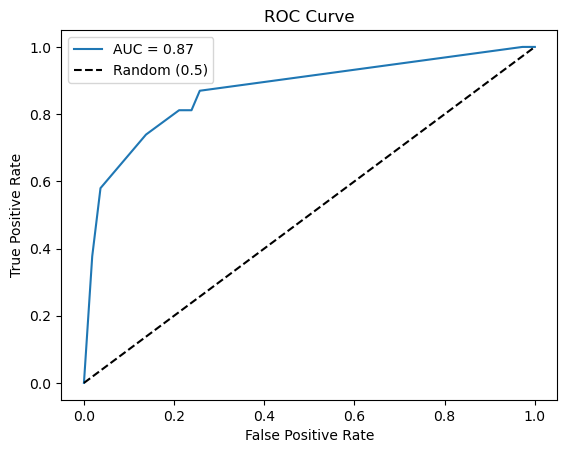

In [103]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Precisas das probabilidades, não das previsões
y_prob = grid_search.predict_proba(Xtest)[:, 1]

# Calcula o AUC
auc = roc_auc_score(Ytest, y_prob)
print(f"AUC: {np.round(auc,2)}")

# Plota a curva ROC
fpr, tpr, _ = roc_curve(Ytest, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {np.round(auc,2)}')
plt.plot([0, 1], [0, 1], 'k--', label='Random (0.5)')  # linha do chute aleatório
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [102]:
from sklearn.metrics import roc_curve, accuracy_score, classification_report

# 1. Obtém as probabilidades
y_prob = grid_search.predict_proba(Xtest)[:, 1]

# 2. Encontra o melhor limiar
fpr, tpr, thresholds = roc_curve(Ytest, y_prob)
youden = tpr - fpr
best_idx = youden.argmax()
best_threshold = thresholds[best_idx]


# 3.Previsões com limiar default (0.5)
y_pred_default = (y_prob >= 0.5).astype(int)

# 4. Faz previsões com o novo limiar
y_pred = (y_prob >= best_threshold).astype(int)


# Comparação
print("=" * 50)
print("LIMIAR DEFAULT (0.5)")
print("=" * 50)
print(f"Accuracy: {accuracy_score(Ytest, y_pred_default):.4f}")
print(classification_report(Ytest, y_pred_default))

print("=" * 50)
print(f"LIMIAR YOUDEN ({best_threshold:.2f})")
print("=" * 50)
print(f"Accuracy: {accuracy_score(Ytest, y_pred):.4f}")
print(classification_report(Ytest, y_pred))


LIMIAR DEFAULT (0.5)
Accuracy: 0.8146
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       109
           1       0.77      0.74      0.76        69

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178

LIMIAR YOUDEN (0.29)
Accuracy: 0.7921
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       109
           1       0.68      0.87      0.76        69

    accuracy                           0.79       178
   macro avg       0.79      0.81      0.79       178
weighted avg       0.82      0.79      0.79       178

